In [ ]:
import numpy as np

In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
# prompt: read a xlsx file using pandas
import pandas as pd
data = pd.read_excel('/content/Assignment-1_Data.xlsx')
# display the first 5 rows
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.head(20)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64


In [ ]:
data.shape

(522064, 7)

In [ ]:
data = data.dropna(subset=['Itemname'])

In [ ]:
data.shape

(520609, 7)

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(516778, 7)

In [ ]:
data = data[(data['Quantity'] > 0) & (data['Price'] > 0)]
data.shape

(514270, 7)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'],format='%d.%m.%Y %H:%M')
data['Quantity'] = data['Quantity'].astype(int)

# Optional-Reset index after cleaning
data = data.reset_index(drop=True)

data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
top_products = data['Itemname'].value_counts().head(20)
print("Top 10 most frequently purchased items:\n", top_products)

Top 10 most frequently purchased items:
 Itemname
WHITE HANGING HEART T-LIGHT HOLDER    2253
JUMBO BAG RED RETROSPOT               2081
REGENCY CAKESTAND 3 TIER              1920
PARTY BUNTING                         1669
LUNCH BAG RED RETROSPOT               1558
ASSORTED COLOUR BIRD ORNAMENT         1452
SET OF 3 CAKE TINS PANTRY DESIGN      1353
PACK OF 72 RETROSPOT CAKE CASES       1310
LUNCH BAG  BLACK SKULL.               1288
NATURAL SLATE HEART CHALKBOARD        1238
JUMBO BAG PINK POLKADOT               1225
HEART OF WICKER SMALL                 1199
JUMBO STORAGE BAG SUKI                1188
JUMBO SHOPPER VINTAGE RED PAISLEY     1171
PAPER CHAIN KIT 50'S CHRISTMAS        1167
LUNCH BAG SPACEBOY DESIGN             1154
LUNCH BAG CARS BLUE                   1144
SPOTTY BUNTING                        1127
JAM MAKING SET PRINTED                1118
WOODEN PICTURE FRAME WHITE FINISH     1098
Name: count, dtype: int64


Top 10 most frequently purchased items:
 Itemname
WHITE HANGING HEART T-LIGHT HOLDER    2253
JUMBO BAG RED RETROSPOT               2081
REGENCY CAKESTAND 3 TIER              1920
PARTY BUNTING                         1669
LUNCH BAG RED RETROSPOT               1558
ASSORTED COLOUR BIRD ORNAMENT         1452
SET OF 3 CAKE TINS PANTRY DESIGN      1353
PACK OF 72 RETROSPOT CAKE CASES       1310
LUNCH BAG  BLACK SKULL.               1288
NATURAL SLATE HEART CHALKBOARD        1238
Name: count, dtype: int64


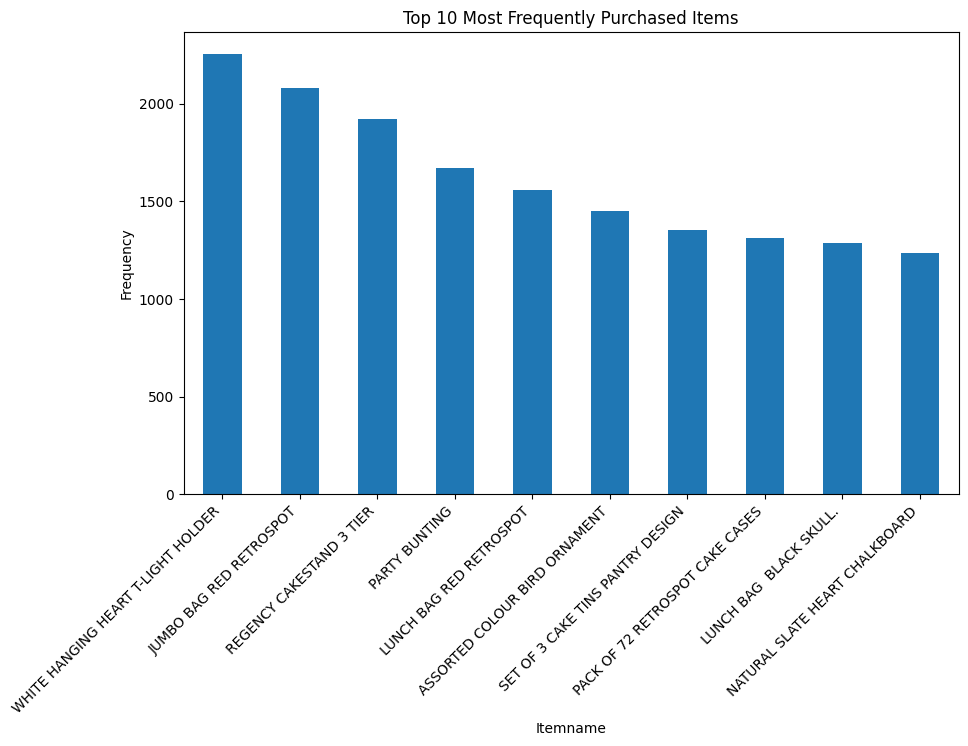

In [ ]:
# Top 10 most frequently purchased items
top_products = data['Itemname'].value_counts().head(10)
print("Top 10 most fretly purchased items:\n", top_products)

# Visualization
import matplotlib.pyplot as plt

top_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Most Frequently Purchased Items')
plt.xlabel('Itemname')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Transaction size summary:
 count    19559.000000
mean        26.013600
std         47.303971
min          1.000000
25%          6.000000
50%         15.000000
75%         29.000000
max       1108.000000
Name: Itemname, dtype: float64


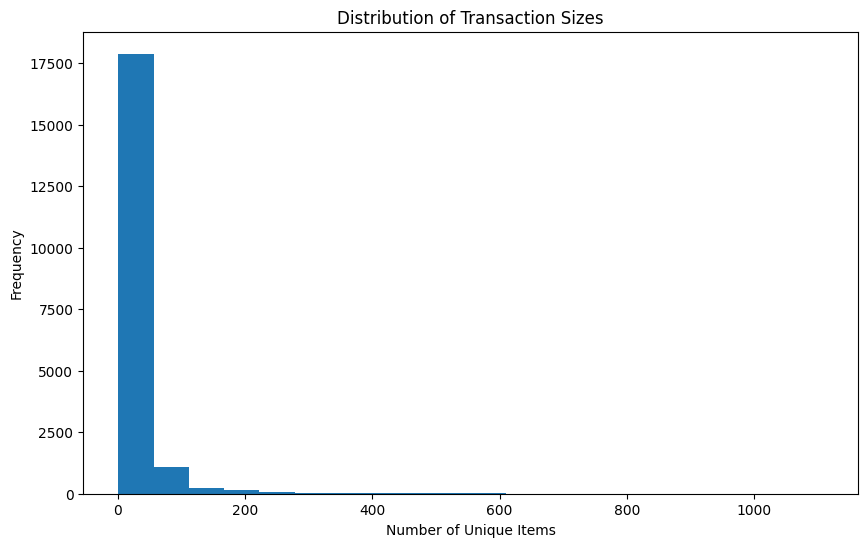

In [ ]:
# Number of unique items per transaction
transaction_size = data.groupby('BillNo')['Itemname'].nunique()
print("Transaction size summary:\n", transaction_size.describe())

# Visualization
transaction_size.plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Distribution of Transaction Sizes')
plt.xlabel('Number of Unique Items')
plt.ylabel('Frequency')
plt.show()

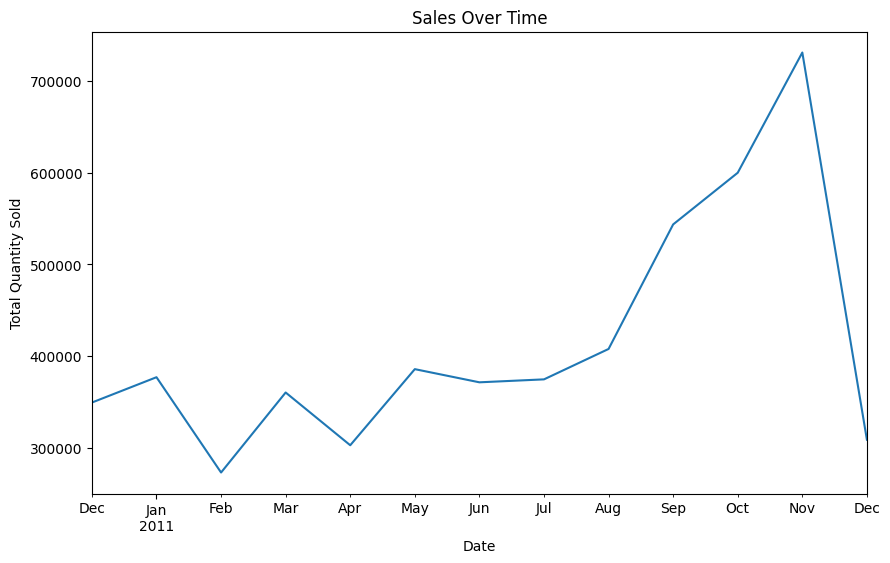

In [ ]:
# Sales trends over time
data['Date'] = pd.to_datetime(data['Date'])  # Ensure 'Date' is in datetime format
sales_over_time = data.set_index('Date').resample('M')['Quantity'].sum()

# Visualization
sales_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.show()


In [ ]:
sales_over_time.head(10)

,Quantity
Date,
2010-12-31,349426
2011-01-31,377045
2011-02-28,273125
2011-03-31,360383
2011-04-30,302863
2011-05-31,385843
2011-06-30,371487
2011-07-31,374701
2011-08-31,407850


Customer purchase frequency summary:
 count    4296.000000
mean        4.226955
std         7.082348
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: BillNo, dtype: float64


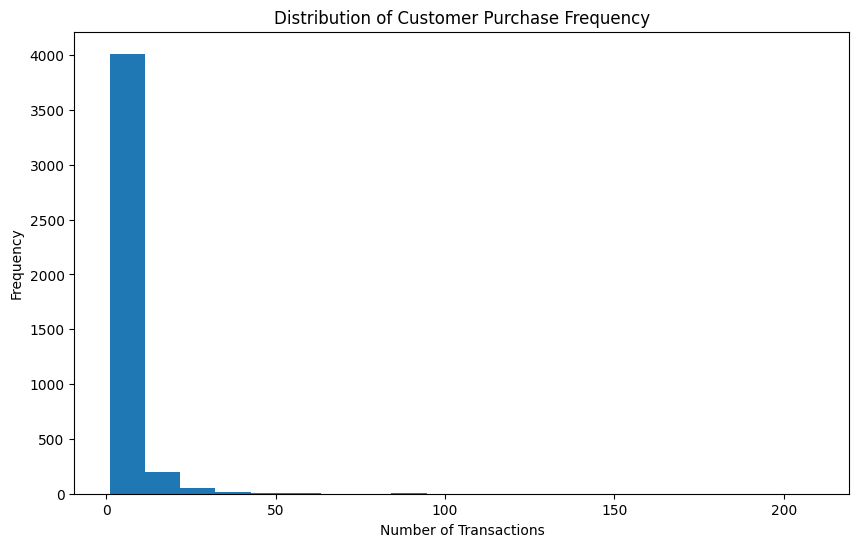

In [ ]:
# Number of transactions per customer
customer_purchases = data.groupby('CustomerID')['BillNo'].nunique()
print("Customer purchase frequency summary:\n", customer_purchases.describe())

# Visualization
customer_purchases.plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()


In [ ]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [ ]:
data['Country'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Country,
United Kingdom,479908
Germany,9025
France,8392
Spain,2479
Netherlands,2359
Belgium,2031
Switzerland,1958
Portugal,1492
Australia,1181


In [ ]:
data1 = data[data['Country'] == 'France']
data1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
26,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France


In [ ]:
# Convert the dataset into the appropriate format for the Apriori algorithm
basket = data1.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('BillNo')
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Check the first few rows of the transformed dataset
basket.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-37-eb39d84a4b6a>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Apply Apriori with a lower minimum support
frequent_itemsets = apriori(basket, min_support=0.07, use_colnames=True)

# Generate association rules with a lower minimum confidence
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules
print(rules)



                                           antecedents  \
0                          (ALARM CLOCK BAKELIKE PINK)   
1                         (ALARM CLOCK BAKELIKE GREEN)   
2                         (ALARM CLOCK BAKELIKE GREEN)   
3                           (ALARM CLOCK BAKELIKE RED)   
4                         (ALARM CLOCK BAKELIKE GREEN)   
..                                                 ...   
135  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
136                    (SET/6 RED SPOTTY PAPER PLATES)   
137                                          (POSTAGE)   
138               (SET/20 RED RETROSPOT PAPER NAPKINS)   
139                      (SET/6 RED SPOTTY PAPER CUPS)   

                                           consequents  antecedent support  \
0                         (ALARM CLOCK BAKELIKE GREEN)            0.102041   
1                          (ALARM CLOCK BAKELIKE PINK)            0.096939   
2                           (ALARM CLOCK BAKELIKE RED)            0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(140, 10)

In [ ]:
rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859,0.964734
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383,0.959283
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
4,(ALARM CLOCK BAKELIKE GREEN),(POSTAGE),0.096939,0.765306,0.084184,0.868421,1.134737,0.009996,1.783673,0.131484
5,(POSTAGE),(ALARM CLOCK BAKELIKE GREEN),0.765306,0.096939,0.084184,0.110000,1.134737,0.009996,1.014676,0.505929
6,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135,0.968652
7,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061,0.960466
8,(ALARM CLOCK BAKELIKE PINK),(POSTAGE),0.102041,0.765306,0.089286,0.875000,1.143333,0.011193,1.877551,0.139610
9,(POSTAGE),(ALARM CLOCK BAKELIKE PINK),0.765306,0.102041,0.089286,0.116667,1.143333,0.011193,1.016558,0.534161


In [ ]:
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(140, 10)

In [ ]:
rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
74,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735,0.956140
76,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122,0.981725
77,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041,0.993343
79,"(ALARM CLOCK BAKELIKE GREEN, POSTAGE)",(ALARM CLOCK BAKELIKE RED),0.084184,0.094388,0.071429,0.848485,8.989353,0.063483,5.977041,0.970454
80,"(ALARM CLOCK BAKELIKE RED, POSTAGE)",(ALARM CLOCK BAKELIKE GREEN),0.086735,0.096939,0.071429,0.823529,8.495356,0.063021,5.117347,0.966081
114,"(SET/6 RED SPOTTY PAPER PLATES, POSTAGE)",(SET/6 RED SPOTTY PAPER CUPS),0.107143,0.137755,0.102041,0.952381,6.913580,0.087281,18.107143,0.958000
115,"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.117347,0.127551,0.102041,0.869565,6.817391,0.087073,6.688776,0.966763
118,(SET/6 RED SPOTTY PAPER PLATES),"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS)",0.127551,0.117347,0.102041,0.800000,6.817391,0.087073,4.413265,0.978070
